In [1]:
import warnings
warnings.filterwarnings("ignore")

# Import necessary libraries
from copy import deepcopy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

## Image Request ## 
import requests
from io import BytesIO

In [2]:
!pip install wordcloud

In [3]:
!pip install -U missingno

In [4]:
import missingno as msno

In [5]:
df = pd.read_csv(r'D:\Nhàn\Phân tích kinh doanh hộ trợ đưa ra qdd\final\airqualityHanoi.csv')

In [6]:
print(df.to_string())

            Date Country    City Specie  count    min  max  median  variance
0     24/01/2020      VN  Ha Noi   pm10     24   13.0   32    23.0    171.01
1       4/5/2020      VN  Ha Noi   pm10     24   26.0   53    34.0    971.01
2      3/10/2020      VN  Ha Noi   pm10     24   16.0   49    26.0    814.33
3     20/12/2020      VN  Ha Noi   pm10     24   19.0   37    26.0    225.92
4     22/12/2020      VN  Ha Noi   pm10     24   31.0   57    52.0    794.78
5     14/02/2020      VN  Ha Noi   pm10     24   18.0   43    29.0    552.10
6       3/4/2020      VN  Ha Noi   pm10     24   11.0   56    20.0   1788.62
7     16/07/2020      VN  Ha Noi   pm10     24   18.0   33    25.0    222.54
8     29/08/2020      VN  Ha Noi   pm10     24   16.0   35    26.0    259.93
9       9/5/2020      VN  Ha Noi   pm10     24   18.0   65    39.0   1838.84
10    17/10/2020      VN  Ha Noi   pm10     24    9.0   21    12.0    130.43
11    31/10/2020      VN  Ha Noi   pm10     24   12.0   44    19.0   1207.81

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2453 entries, 0 to 2452
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2453 non-null   object 
 1   Country   2453 non-null   object 
 2   City      2453 non-null   object 
 3   Specie    2453 non-null   object 
 4   count     2453 non-null   int64  
 5   min       2453 non-null   float64
 6   max       2453 non-null   int64  
 7   median    2453 non-null   float64
 8   variance  2453 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 172.6+ KB


In [14]:
print(df.columns)

Index(['Date', 'Country', 'City', 'Specie', 'count', 'min', 'max', 'median',
       'variance'],
      dtype='object')


In [15]:
 pip install pandas scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [20]:
from sklearn.preprocessing import MinMaxScaler
# Chọn các cột cần chuẩn hóa
data = pd.read_csv(r'D:\Nhàn\Phân tích kinh doanh hộ trợ đưa ra qdd\final\airqualityHanoi.csv')
columns_to_normalize = ['count', 'min', 'max', 'median', 'variance']

# Khởi tạo MinMaxScaler
scaler = MinMaxScaler()

# Chuẩn hóa các cột được chọn
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# In kết quả
print(data)

            Date Country    City Specie     count       min       max  \
0     24/01/2020      VN  Ha Noi   pm10  0.478261  0.061166  0.093093   
1       4/5/2020      VN  Ha Noi   pm10  0.478261  0.122807  0.156156   
2      3/10/2020      VN  Ha Noi   pm10  0.478261  0.075391  0.144144   
3     20/12/2020      VN  Ha Noi   pm10  0.478261  0.089616  0.108108   
4     22/12/2020      VN  Ha Noi   pm10  0.478261  0.146515  0.168168   
...          ...     ...     ...    ...       ...       ...       ...   
2448  22/12/2020      VN  Ha Noi    no2  1.000000  0.034614  0.174174   
2449   12/1/2021      VN  Ha Noi    no2  1.000000  0.021337  0.138138   
2450  26/05/2020      VN  Ha Noi    no2  0.869565  0.001897  0.036036   
2451   10/6/2020      VN  Ha Noi    no2  1.000000  0.001897  0.090090   
2452  19/08/2020      VN  Ha Noi    no2  0.978261  0.006164  0.075075   

        median  variance  
0     0.090550  0.002072  
1     0.134045  0.011764  
2     0.102412  0.009866  
3     0.102412 

In [21]:
from sklearn.cluster import KMeans

In [22]:
data_for_clustering = data[['count', 'min', 'max', 'median', 'variance']]

# Số lượng nhóm mong muốn
num_clusters = 3

# Khởi tạo mô hình K-means
kmeans = KMeans(n_clusters=num_clusters)

# Huấn luyện mô hình trên dữ liệu
kmeans.fit(data_for_clustering)

# Nhãn của các mẫu
labels = kmeans.labels_

# Thêm cột nhãn vào DataFrame gốc
data['classification'] = labels

# Ánh xạ nhãn về nhãn tương ứng ("Tốt", "Trung bình", "Độc hại")
label_mapping = {
    0: 'Good',
    1: 'Medium',
    2: 'Poisonous'
}

# Chuyển đổi nhãn sang nhãn phân loại tương ứng
data['classification'] = data['classification'].map(label_mapping)

# In kết quả phân loại
for index, row in data.iterrows():
    print(f"Mẫu {index+1}: {row['classification']}")

# Phân bổ các mẫu vào các nhóm
grouped_data = data.groupby('classification')
for classification, group in grouped_data:
    print(f"Nhóm {classification}: {len(group)} mẫu")

Mẫu 1: Medium
Mẫu 2: Medium
Mẫu 3: Medium
Mẫu 4: Medium
Mẫu 5: Medium
Mẫu 6: Medium
Mẫu 7: Medium
Mẫu 8: Medium
Mẫu 9: Medium
Mẫu 10: Medium
Mẫu 11: Medium
Mẫu 12: Medium
Mẫu 13: Medium
Mẫu 14: Medium
Mẫu 15: Medium
Mẫu 16: Medium
Mẫu 17: Medium
Mẫu 18: Medium
Mẫu 19: Medium
Mẫu 20: Medium
Mẫu 21: Medium
Mẫu 22: Medium
Mẫu 23: Medium
Mẫu 24: Medium
Mẫu 25: Medium
Mẫu 26: Medium
Mẫu 27: Medium
Mẫu 28: Medium
Mẫu 29: Medium
Mẫu 30: Medium
Mẫu 31: Medium
Mẫu 32: Medium
Mẫu 33: Medium
Mẫu 34: Medium
Mẫu 35: Medium
Mẫu 36: Medium
Mẫu 37: Medium
Mẫu 38: Medium
Mẫu 39: Medium
Mẫu 40: Medium
Mẫu 41: Medium
Mẫu 42: Medium
Mẫu 43: Medium
Mẫu 44: Medium
Mẫu 45: Medium
Mẫu 46: Medium
Mẫu 47: Medium
Mẫu 48: Medium
Mẫu 49: Medium
Mẫu 50: Medium
Mẫu 51: Medium
Mẫu 52: Medium
Mẫu 53: Medium
Mẫu 54: Medium
Mẫu 55: Medium
Mẫu 56: Medium
Mẫu 57: Medium
Mẫu 58: Medium
Mẫu 59: Medium
Mẫu 60: Medium
Mẫu 61: Medium
Mẫu 62: Medium
Mẫu 63: Medium
Mẫu 64: Medium
Mẫu 65: Medium
Mẫu 66: Medium
Mẫu 67: Medium
Mẫu 

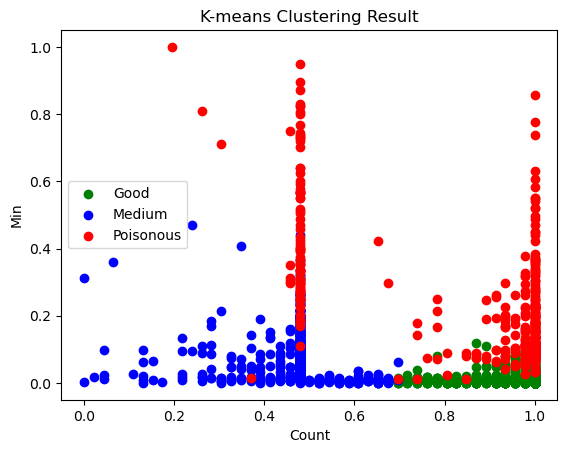

In [23]:
colors = {'Good': 'green', 'Medium': 'blue', 'Poisonous': 'red'}

for classification, group in grouped_data:
    plt.scatter(group['count'], group['min'], color=colors[classification], label=classification)

# Đặt nhãn và tiêu đề cho biểu đồ
plt.xlabel('Count')
plt.ylabel('Min')
plt.title('K-means Clustering Result')

# Hiển thị chú thích (legend)
plt.legend()

# Hiển thị biểu đồ
plt.show()